In [1]:
#import dependencies
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score 
# classification_report_imbalanced   
import matplotlib.mlab as mlab
import sklearn as skl
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
%matplotlib inline
!pip install keras_tuner
import keras_tuner as kt

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded_files = files.upload()

Saving Framingham_clean.csv to Framingham_clean (3).csv


In [3]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [6]:
cvd_df.shape

(3658, 16)

In [7]:
cvd_df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [8]:

cvd_df.describe()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Defining features set
X = cvd_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85


In [10]:
# Defining target vector
y = cvd_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0])

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the Decision Tree Model

In [15]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [16]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

Making Predictions using the Tree Model

In [17]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

Model Evaluation

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("DT Confusion Matrix")
display(cm_df)
print(f"DT Accuracy Score : {acc_score}")
print("DT Classification Report")
print(classification_report(y_test, predictions))

DT Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,657,118
Actual 1,99,41


DT Accuracy Score : 0.7628415300546448
DT Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       775
           1       0.26      0.29      0.27       140

    accuracy                           0.76       915
   macro avg       0.56      0.57      0.57       915
weighted avg       0.78      0.76      0.77       915



In [20]:
# Create DOT data
#dot_data = tree.export_graphviz(
    #dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True)

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#Image(graph.create_png())

 Fitting the Random Forest Model

In [21]:
# Creating a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Making Predictions using the Random Forest model

In [23]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

Model Evaluation

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [25]:
# Displaying results
print("RF Confusion Matrix")
display(cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

RF Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,769,6
Actual 1,136,4


RF Accuracy Score : 0.8448087431693989
RF Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.40      0.03      0.05       140

    accuracy                           0.84       915
   macro avg       0.62      0.51      0.48       915
weighted avg       0.78      0.84      0.78       915



In [26]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13339031982652996, 'Systolic_Blood_Pressure'),
 (0.12872809244092706, 'BMI'),
 (0.1281075071286606, 'Age'),
 (0.12223071749935507, 'Total_Cholesterol'),
 (0.12023574141818423, 'Glucose'),
 (0.11916232255516142, 'Diastolic_Blood_Pressure'),
 (0.09483738807752018, 'Heart_Rate'),
 (0.049212468693805106, 'Cigarettes_Per_Day'),
 (0.036432943412911326, 'Education'),
 (0.020878156908295694, 'Sex_Male'),
 (0.01772737060052536, 'Prevalent_Hypertension'),
 (0.012219808876814635, 'Current_Smoker'),
 (0.007709252451526337, 'Blood_Pressure_Medications'),
 (0.007057377916311747, 'Diabetes'),
 (0.002070532193471244, 'Prevalent_Stroke')]

FileNotFoundError: ignored

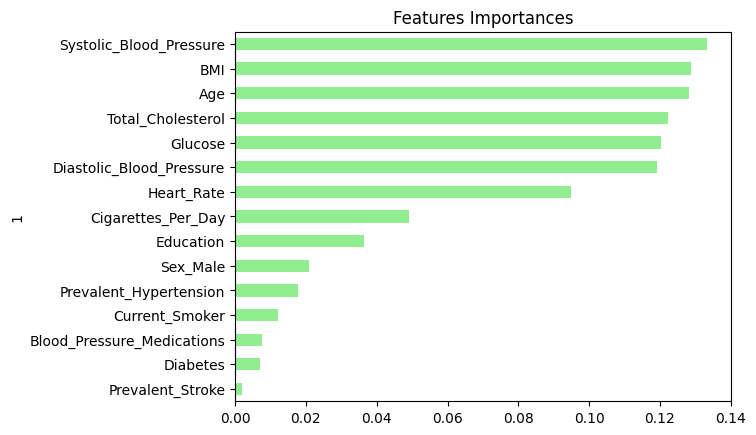

In [27]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
feature_importance = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

#feature_importance.get_figure().savefig('Output/feature_importance_plot.png')


Dropping the 4 least important features

In [28]:
# Creating a copy of our dataframe
cvd1_df = cvd_df.copy()

cvd1_df.drop(['Prevalent_Stroke','Diabetes', 'Blood_Pressure_Medications', 'Current_Smoker'], axis=1, inplace=True)

In [29]:
# Defining features set
X = cvd1_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Cigarettes_Per_Day,Prevalent_Hypertension,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,20,0,245,127.5,80.0,25.34,75,70
3,0,61,3,30,1,225,150.0,95.0,28.58,65,103
4,0,46,3,23,0,285,130.0,84.0,23.10,85,85


In [30]:
# Previewing the data
X.head()

,Sex_Male,Age,Education,Cigarettes_Per_Day,Prevalent_Hypertension,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,20,0,245,127.5,80.0,25.34,75,70
3,0,61,3,30,1,225,150.0,95.0,28.58,65,103
4,0,46,3,23,0,285,130.0,84.0,23.10,85,85


In [31]:
# Defining target vector
y = cvd1_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0])

In [32]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
# Creating the StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the KNeighbors Model

In [34]:
# Instantiating the model with k = 3 neighbors
kn_model = KNeighborsClassifier(n_neighbors=3)

In [35]:
# Training the model
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Making Predictions using the KN model

In [36]:
# Creating predictions
y_pred = kn_model.predict(X_test_scaled)

# Reviewing the predictions
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [37]:
# Printing the confusion matrix
knn_cm = confusion_matrix(y_pred,y_test)

array([[735, 119],
       [ 40,  21]])

In [38]:
# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       854
           1       0.15      0.34      0.21        61

    accuracy                           0.83       915
   macro avg       0.55      0.60      0.56       915
weighted avg       0.90      0.83      0.86       915



In [ ]:
# Calculating the confusion matrix
knn_cm = confusion_matrix(y_test, predictions)
knn_cm_df = pd.DataFrame(
    knn_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("K-nearest Confusion Matrix")
display(knn_cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

Creating a Keras Sequential model

In [39]:
 # Initiating the model add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=11))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Fitting the NN model

In [40]:
 # Compiling the model and training 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 4s 5ms/step - loss: 0.7793 - accuracy: 0.3143
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.7000
Epoch 3/50
86/86 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.8217
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.8476
Epoch 5/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.8480
Epoch 6/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4323 - accuracy: 0.8480
Epoch 7/50
86/86 [==============================] - 1s 6ms/step - loss: 0.4138 - accuracy: 0.8480
Epoch 8/50
86/86 [==============================] - 0s 6ms/step - loss: 0.4054 - accuracy: 0.8480
Epoch 9/50
86/86 [==============================] - 1s 6ms/step - loss: 0.4001 - accuracy: 0.8480
Epoch 10/50
86/86 [==============================] - 0s 5ms/step - loss: 0.3959 - accuracy: 0.8480
Epoch 11/50
86/86 [

Evaluating the NN model 

In [41]:
 # Evaluating the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.3852 - accuracy: 0.8536 - 229ms/epoch - 8ms/step
Loss: 0.3851892650127411, Accuracy: 0.8535519242286682


In [ ]:
# Calculating the confusion matrix
#nn_cm = confusion_matrix(y_test, predictions)
#nn_cm_df = pd.DataFrame(
    #nn_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)



# Displaying results
#print("K-nearest Confusion Matrix")
#display(nn_cm_df)
print(f"Keras NN Accuracy Score : {model_accuracy}")
print("Keras NN Classification Report")
print(classification_report(y_test, predictions))

With the above accuracy (from the test dataset) being so much lower than the accuracy from the training data (see the last epoch accuracies), we can deduct that our model has been overfitting. Therefore next we will try to increase the training data by changing the split of training and testing data in the original input data, using Random Oversampler. 

In [ ]:
# Instantiating the random oversampler model and assigning a random_state parameter of 1 to the model
# ros = RandomOverSampler(random_state=1) 


# Fitting the original training data to the random_oversampler model
# X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Creating scaler instance
#X_scaler = skl.preprocessing.StandardScaler()

# Fitting the scaler
#X_scaler.fit(X_train_ros)

# Scaling the new resampled training data
#X_train_ros_scaled = X_scaler.transform(X_train_ros)

Running auto-optimization using Keras Tuner to search for best hyperparameters

In [42]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=11))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [45]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [46]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 23s]
val_accuracy: 0.8469945192337036

Best val_accuracy So Far: 0.8590164184570312
Total elapsed time: 00h 21m 24s


In [47]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 3,
 'num_layers': 5,
 'units_0': 9,
 'units_1': 7,
 'units_2': 5,
 'units_3': 9,
 'units_4': 9,
 'units_5': 3,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [48]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 1s - loss: 0.3784 - accuracy: 0.8590 - 580ms/epoch - 20ms/step
Loss: 0.378421425819397, Accuracy: 0.8590164184570312


From here on below we will re-run the KNN and Keras NN models without dropping any column.

In [49]:
# Creating a copy of our dataframe
cvd2_df = cvd_df.copy()



In [50]:
# Defining features set
X = cvd2_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85


In [51]:
# Defining target vector
y = cvd2_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0])

In [52]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
# Creating the StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the KNeighbors Model

In [54]:
# Instantiating the model with k = 3 neighbors
kn_model = KNeighborsClassifier(n_neighbors=3)

In [55]:
# Training the model
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Making Predictions using the KN model

In [56]:
# Creating predictions
y_pred = kn_model.predict(X_test_scaled)

# Reviewing the predictions
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [57]:
# Printing the confusion matrix
confusion_matrix(y_pred,y_test)

array([[725, 118],
       [ 50,  22]])

In [58]:
# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.16      0.31      0.21        72

    accuracy                           0.82       915
   macro avg       0.55      0.58      0.55       915
weighted avg       0.87      0.82      0.84       915



In [59]:
X_train_scaled.shape

(2743, 15)

Creating a Keras Sequential model

In [60]:
 # Initiating the model add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=15))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


Fitting the NN model

In [61]:
 # Compiling the model and training 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.8418
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8480
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8480
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8480
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8480
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8480
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8480
Epoch 8/50
86/86 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8480
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8480
Epoch 10/50
86/86 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8480
Epoch 11/50
86/86 [

Evaluating the NN model 

In [62]:
 # Evaluating the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.3956 - accuracy: 0.8470 - 198ms/epoch - 7ms/step
Loss: 0.39561790227890015, Accuracy: 0.8469945192337036


With the above accuracy (from the test dataset) being so much lower than the accuracy from the training data (see the last epoch accuracies), we can deduct that our model has been overfitting. Therefore next we will try to increase the training data by changing the split of training and testing data in the original input data, using Random Oversampler. 

In [63]:
# Creating scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fitting the scaler
X_scaler.fit(X_train)

# Scaling the new resampled training data
X_train_scaled = X_scaler.transform(X_train)


Next we will use the newly resampled training data along with some auto-optimized hyperparameters with the NN model

Running auto-optimization using Keras Tuner to search for best hyperparameters

In [64]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=15))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [65]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [66]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 19s]
val_accuracy: 0.8579235076904297

Best val_accuracy So Far: 0.860109269618988
Total elapsed time: 00h 20m 04s


In [67]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 2,
 'units_0': 3,
 'units_1': 7,
 'units_2': 1,
 'units_3': 7,
 'units_4': 7,
 'units_5': 3,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [73]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.3797 - accuracy: 0.8601 - 324ms/epoch - 11ms/step
Loss: 0.37973710894584656, Accuracy: 0.860109269618988


What if we resample our data using Random OverSampler?

In [74]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=15))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [75]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [76]:
# Instantiating the random oversampler model and assigning a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1) 


# Fitting the original training data to the random_oversampler model
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Creating scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fitting the scaler
X_scaler.fit(X_train_ros)

# Scaling the new resampled training data
X_train_ros_scaled = X_scaler.transform(X_train_ros)

In [77]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_ros_scaled,y_train_ros,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 29s]
val_accuracy: 0.5934426188468933

Best val_accuracy So Far: 0.8469945192337036
Total elapsed time: 00h 26m 59s


In [78]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 1,
 'num_layers': 1,
 'units_0': 1,
 'units_1': 7,
 'units_2': 5,
 'units_3': 7,
 'units_4': 1,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [79]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.6700 - accuracy: 0.8470 - 459ms/epoch - 16ms/step
Loss: 0.6700286269187927, Accuracy: 0.8469945192337036
